11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


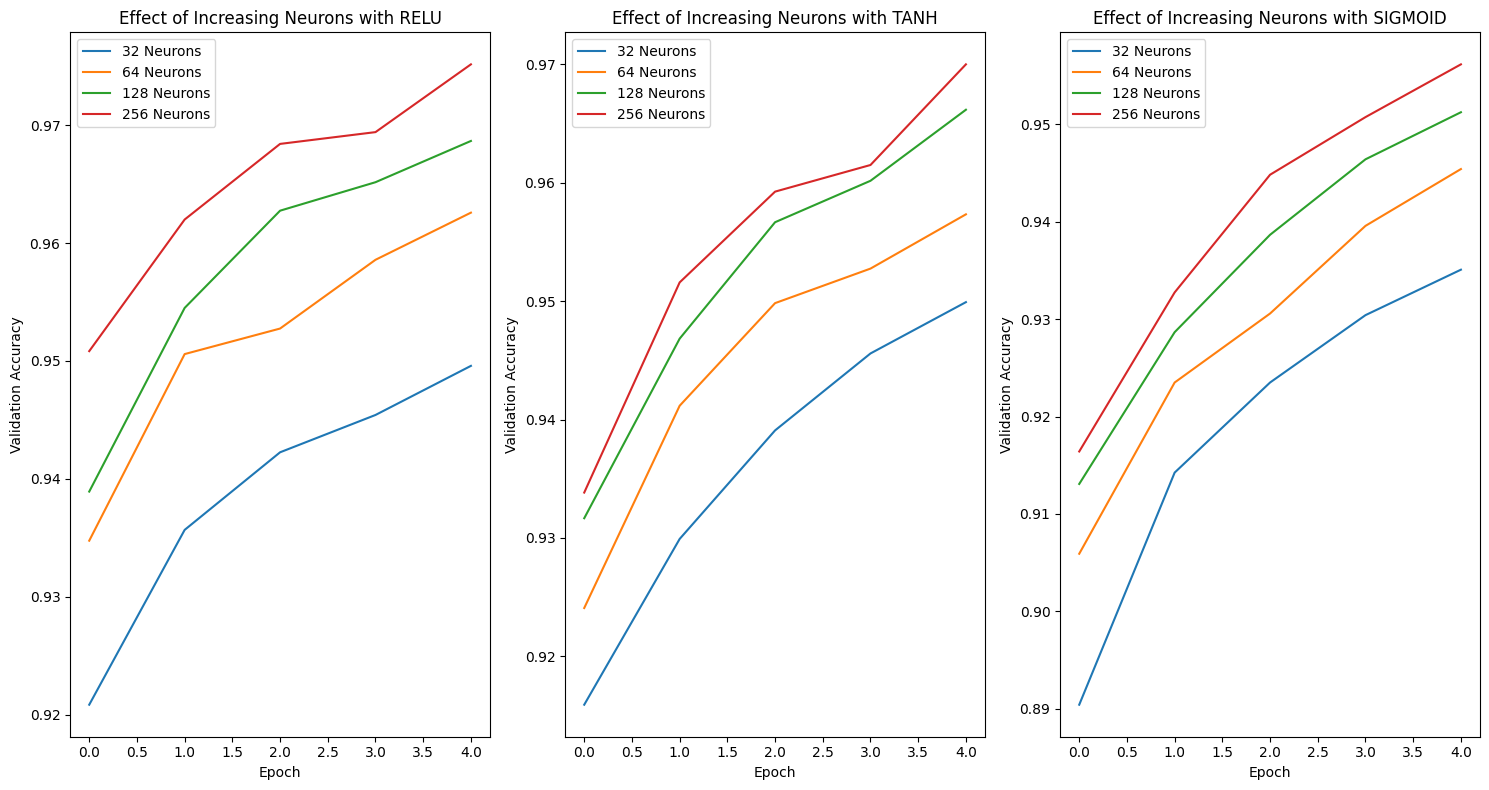

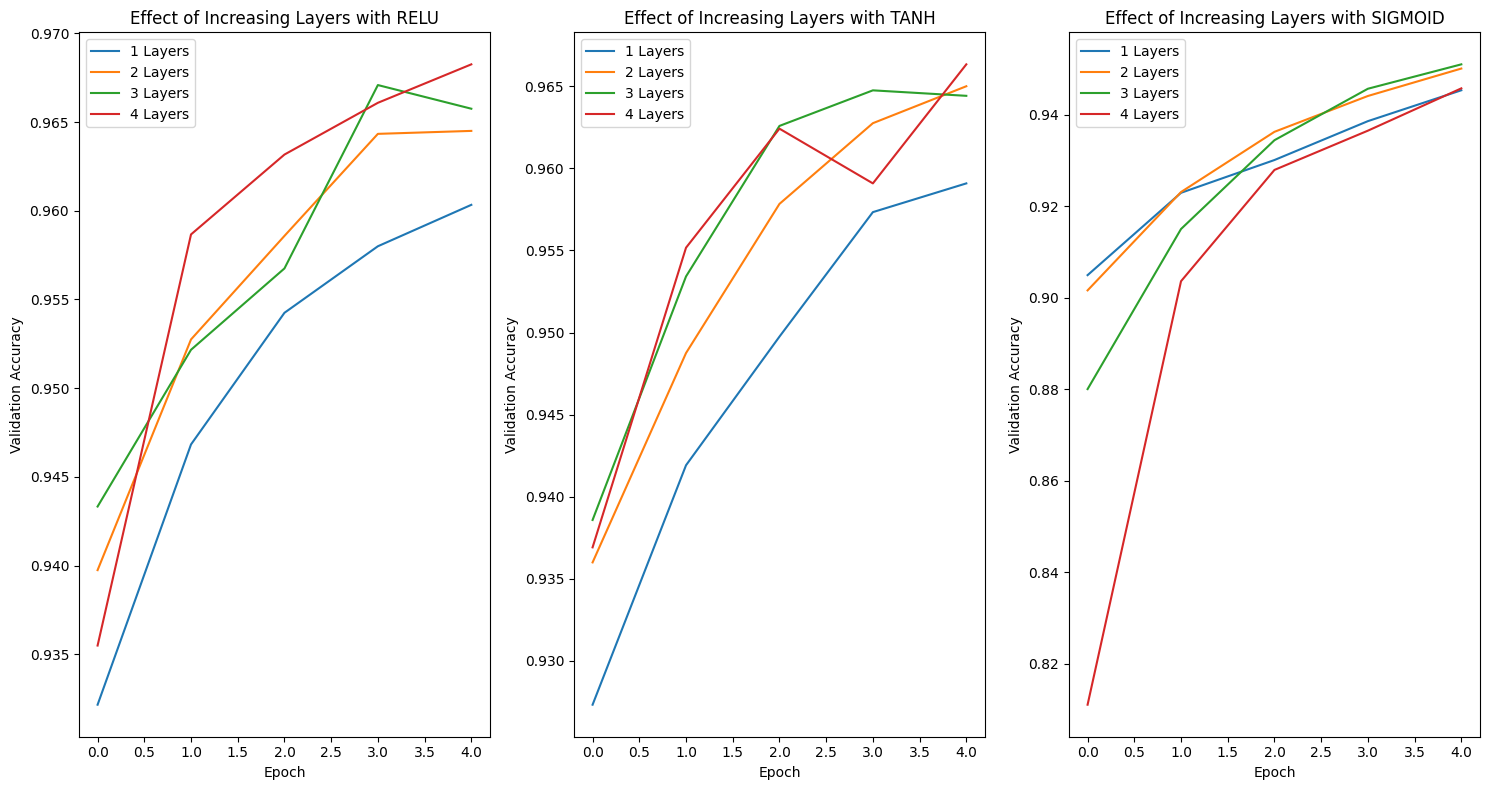

In [1]:
#Practical 4

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to create model
def create_model(hidden_layers=1, hidden_neurons=64, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_neurons, input_shape=(784,), activation=activation))

    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_neurons, activation=activation))

    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment 1: Increasing the number of hidden neurons
neurons = [32, 64, 128, 256]
activations = ['relu', 'tanh', 'sigmoid']
histories_neurons = {act: [] for act in activations}

for act in activations:
    for n in neurons:
        model = create_model(hidden_layers=1, hidden_neurons=n, activation=act)
        history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=0)
        histories_neurons[act].append(history)

# Plot the accuracy for different numbers of neurons for each activation function
plt.figure(figsize=(15, 8))
for act in activations:
    plt.subplot(1, 3, activations.index(act) + 1)
    for i, n in enumerate(neurons):
        plt.plot(histories_neurons[act][i].history['val_accuracy'], label=f'{n} Neurons')
    plt.title(f'Effect of Increasing Neurons with {act.upper()}')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

# Experiment 2: Increasing the number of hidden layers
layers = [1, 2, 3, 4]
histories_layers = {act: [] for act in activations}

for act in activations:
    for l in layers:
        model = create_model(hidden_layers=l, hidden_neurons=64, activation=act)
        history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=0)
        histories_layers[act].append(history)

# Plot the accuracy for different numbers of layers for each activation function
plt.figure(figsize=(15, 8))
for act in activations:
    plt.subplot(1, 3, activations.index(act) + 1)
    for i, l in enumerate(layers):
        plt.plot(histories_layers[act][i].history['val_accuracy'], label=f'{l} Layers')
    plt.title(f'Effect of Increasing Layers with {act.upper()}')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

4473/4473 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4473/4473 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4473/4473 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


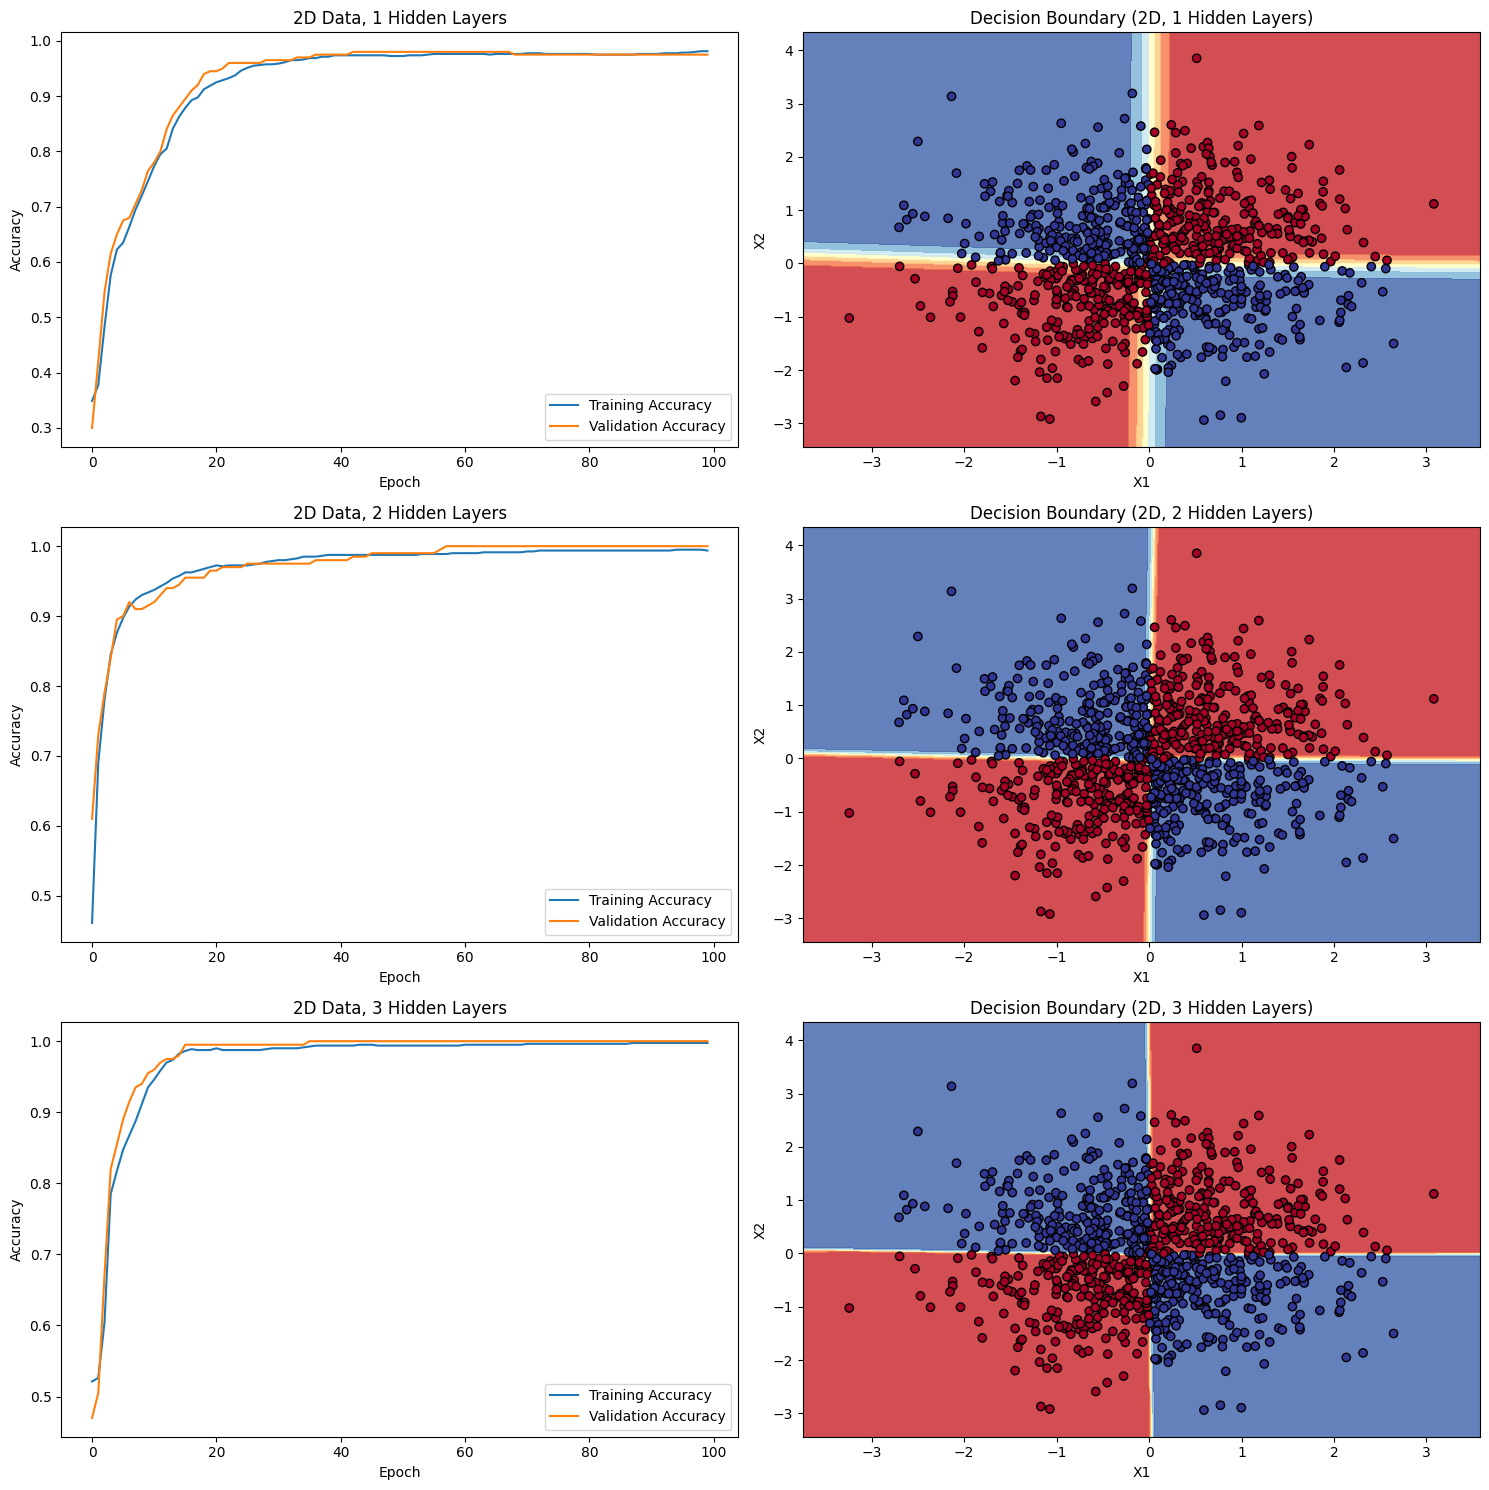

1707/1707 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
  45/1707 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   

<ipython-input-2-1dcad915cb81>:83: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(hidden_layers_list), 2, 2*i + 1)


1707/1707 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1707/1707 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


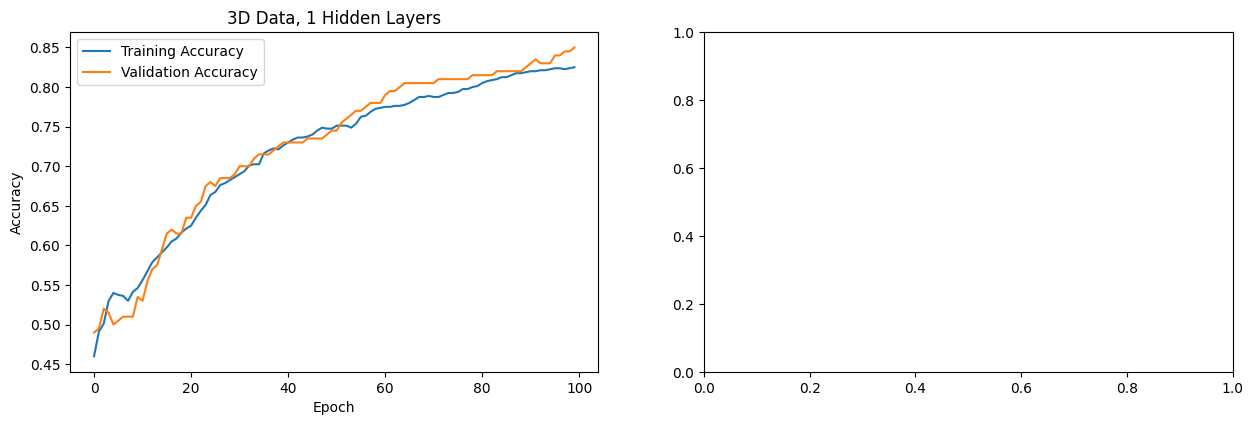

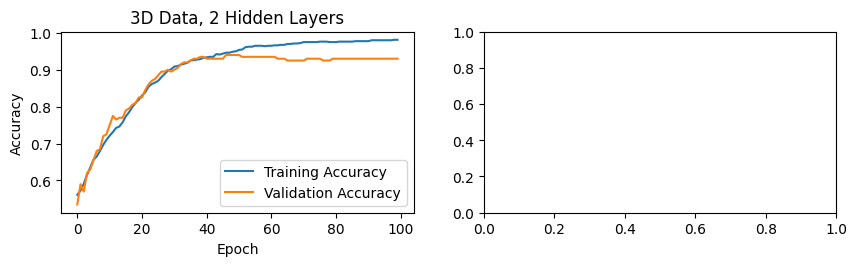

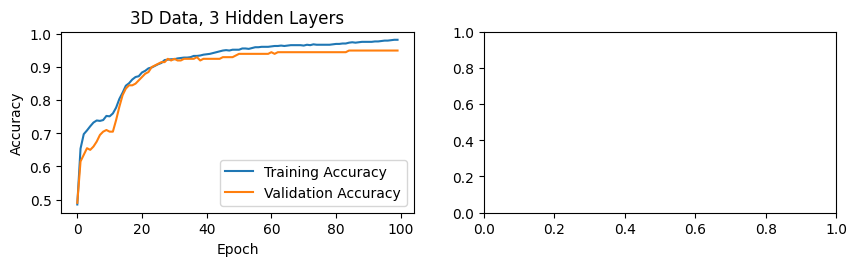

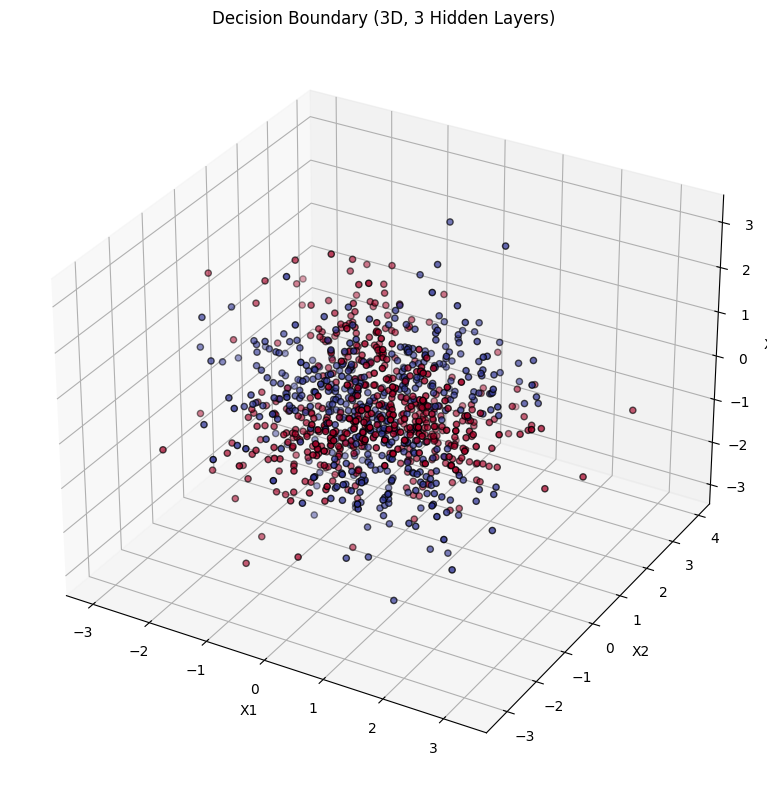


Final accuracies for 2D data:
1 Hidden Layers: 0.9800
2 Hidden Layers: 0.9900
3 Hidden Layers: 0.9950

Final accuracies for 3D data:
1 Hidden Layers: 0.8000
2 Hidden Layers: 0.9450
3 Hidden Layers: 0.9950


In [2]:
#Practical 5

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic data
def generate_data(dim, n_samples=1000):
    if dim == 2:
        X = np.random.randn(n_samples, 2)
        y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    elif dim == 3:
        X = np.random.randn(n_samples, 3)
        y = np.logical_xor(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), X[:, 2] > 0).astype(int)
    return X, y

# Create model
def create_model(input_dim, hidden_layers, neurons_per_layer):
    model = Sequential()
    model.add(Dense(neurons_per_layer, input_shape=(input_dim,), activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train model and return history
def train_model(X, y, hidden_layers, neurons_per_layer):
    model = create_model(X.shape[1], hidden_layers, neurons_per_layer)
    history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    return model, history

# Visualize decision boundary (2D)
def plot_decision_boundary_2d(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel('X1')
    plt.ylabel('X2')

# Visualize decision boundary (3D)
def plot_decision_boundary_3d(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    z_min, z_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.2),
                             np.arange(y_min, y_max, 0.2),
                             np.arange(z_min, z_max, 0.2))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')

# Experiment parameters
dimensions = [2, 3]
hidden_layers_list = [1, 2, 3]
neurons_per_layer = 16

# Run experiments
for dim in dimensions:
    X, y = generate_data(dim)

    plt.figure(figsize=(15, 5 * len(hidden_layers_list)))
    for i, hidden_layers in enumerate(hidden_layers_list):
        model, history = train_model(X, y, hidden_layers, neurons_per_layer)

        plt.subplot(len(hidden_layers_list), 2, 2*i + 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{dim}D Data, {hidden_layers} Hidden Layers')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(len(hidden_layers_list), 2, 2*i + 2)
        if dim == 2:
            plot_decision_boundary_2d(X, y, model)
        else:
            plot_decision_boundary_3d(X, y, model)
        plt.title(f'Decision Boundary ({dim}D, {hidden_layers} Hidden Layers)')

    plt.tight_layout()
    plt.show()

# Print final accuracies
for dim in dimensions:
    X, y = generate_data(dim)
    print(f"\nFinal accuracies for {dim}D data:")
    for hidden_layers in hidden_layers_list:
        model, history = train_model(X, y, hidden_layers, neurons_per_layer)
        print(f"{hidden_layers} Hidden Layers: {history.history['val_accuracy'][-1]:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3528/3528 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


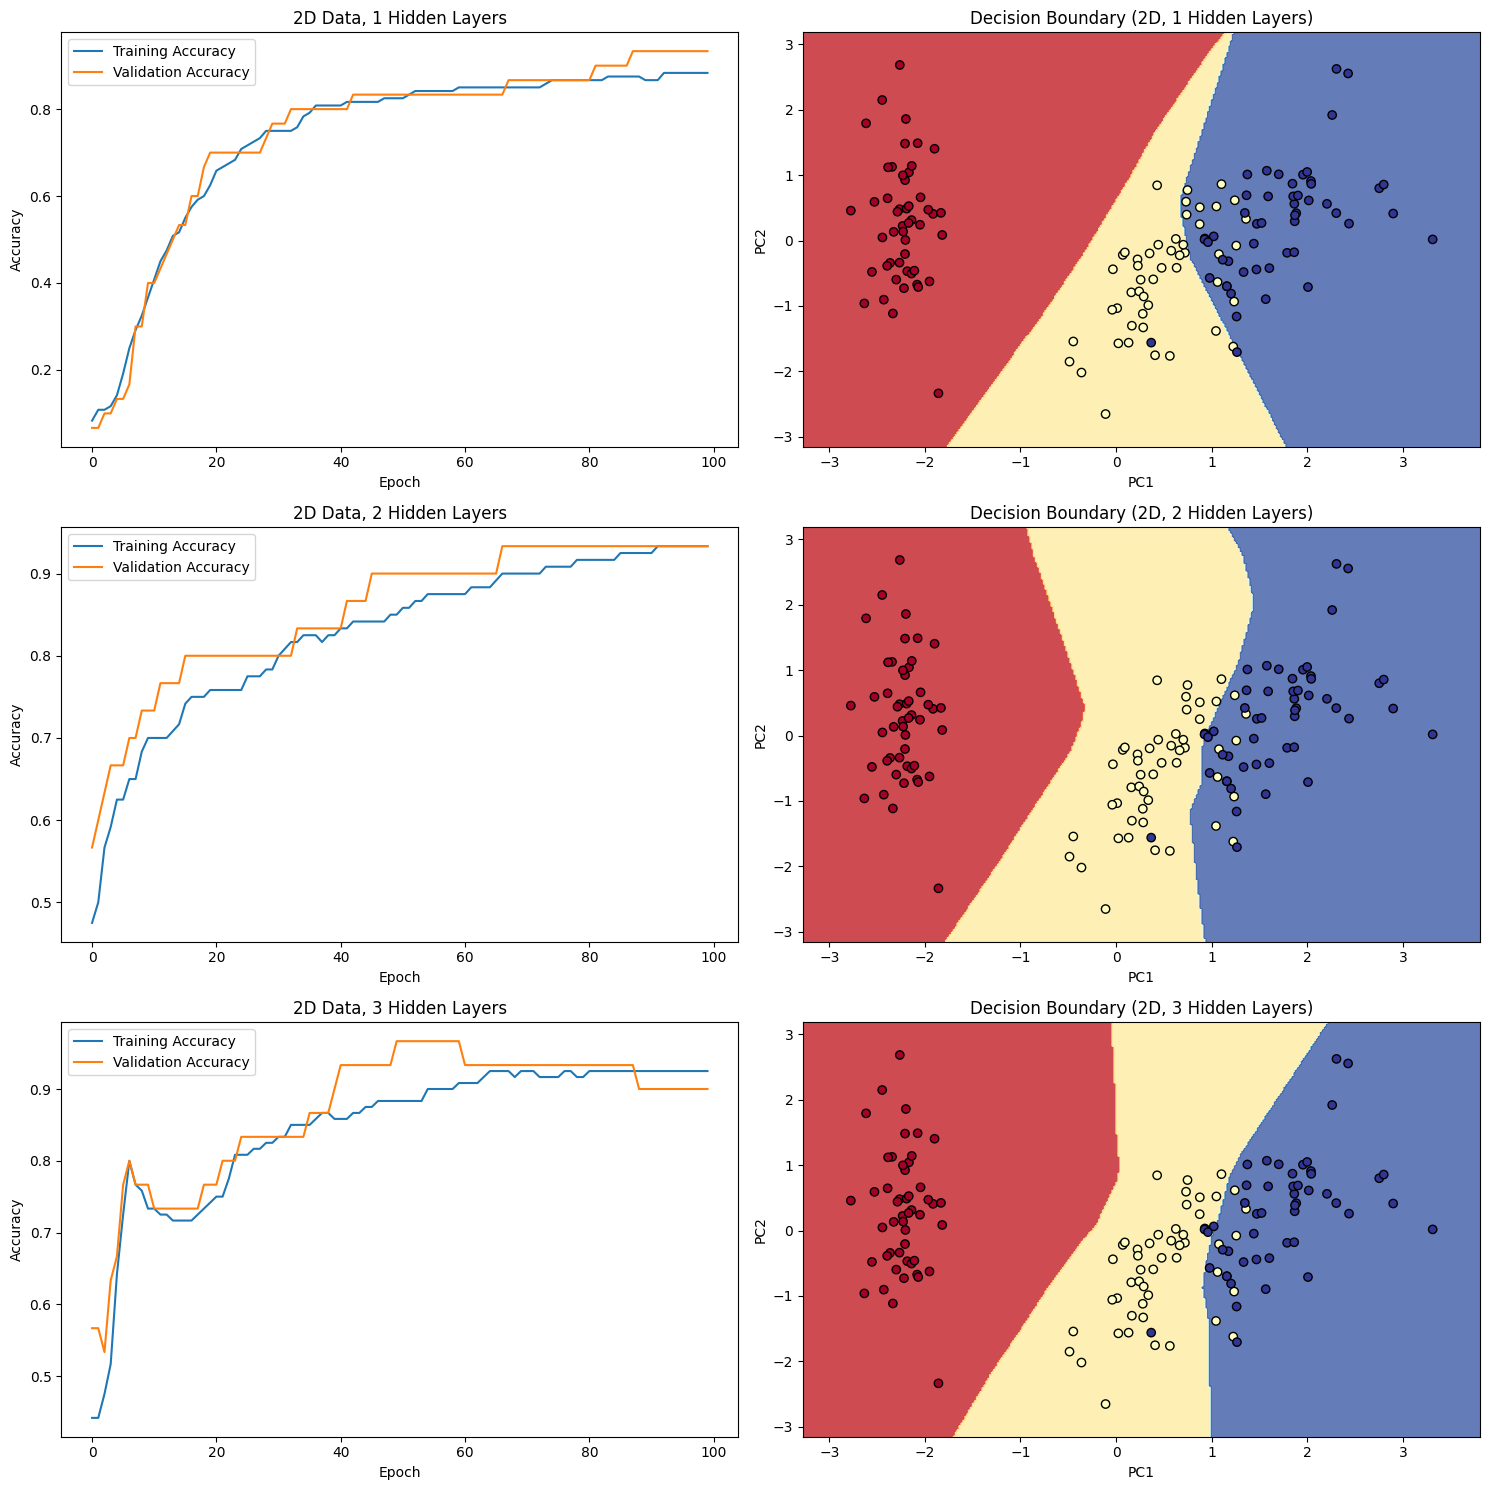

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
 43/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

<ipython-input-3-f7c7ada67314>:96: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(hidden_layers_list), 2, 2*i + 1)


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


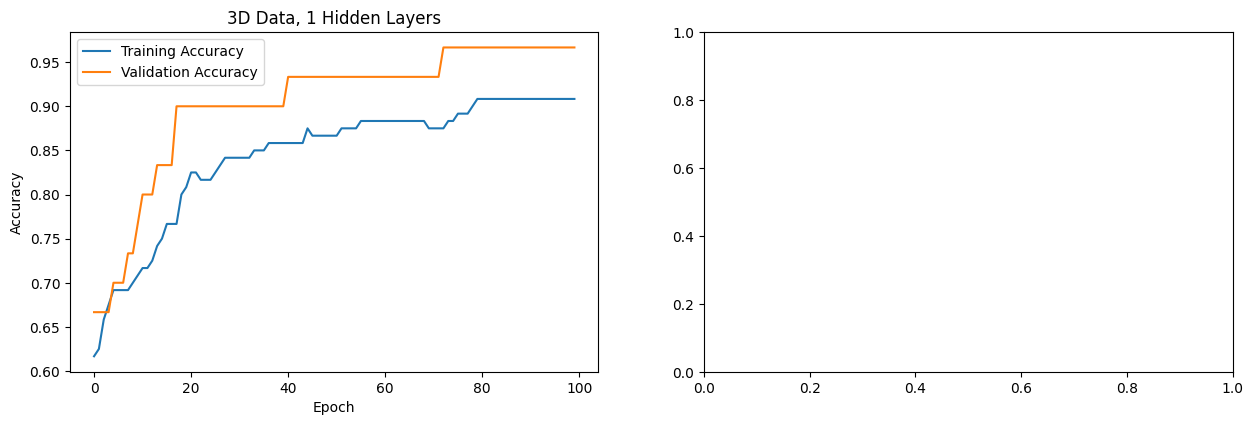

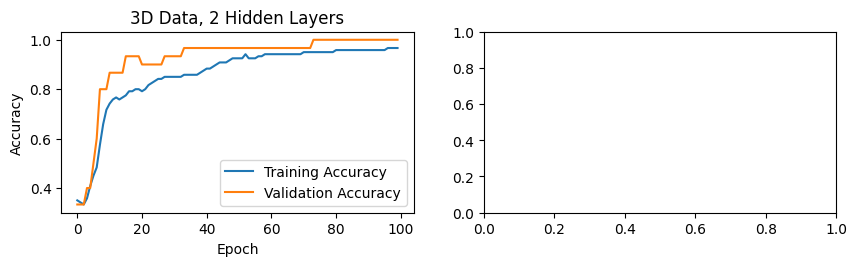

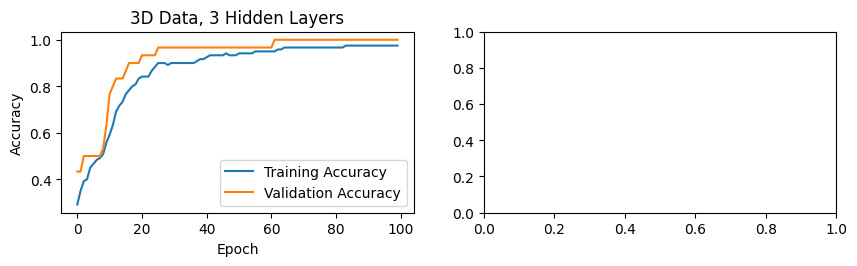

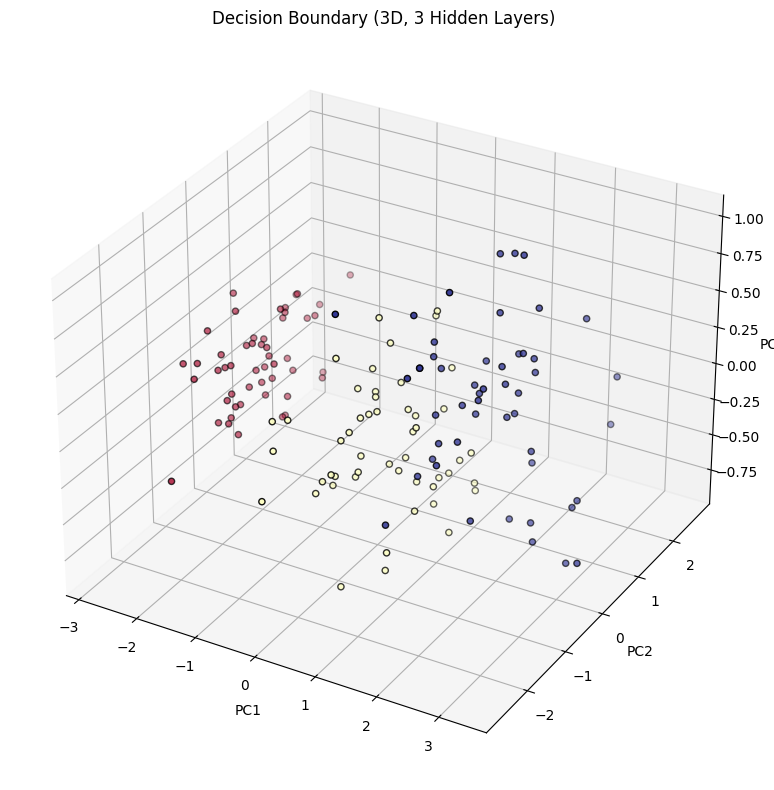


Final accuracies for 2D data:
1 Hidden Layers: 0.9333
2 Hidden Layers: 0.9333
3 Hidden Layers: 0.9000

Final accuracies for 3D data:
1 Hidden Layers: 0.9667
2 Hidden Layers: 1.0000
3 Hidden Layers: 1.0000


In [3]:
#Practical 6

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create 2D and 3D projections of the data
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)
X_2d = pca_2d.fit_transform(X_scaled)
X_3d = pca_3d.fit_transform(X_scaled)

# Create model
def create_model(input_dim, hidden_layers, neurons_per_layer):
    model = Sequential()
    model.add(Dense(neurons_per_layer, input_shape=(input_dim,), activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train model and return history
def train_model(X, y, hidden_layers, neurons_per_layer):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train_cat = to_categorical(y_train)
    y_val_cat = to_categorical(y_val)

    model = create_model(X.shape[1], hidden_layers, neurons_per_layer)
    history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_val, y_val_cat), verbose=0)
    return model, history

# Visualize decision boundary (2D)
def plot_decision_boundary_2d(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

# Visualize decision boundary (3D)
def plot_decision_boundary_3d(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    z_min, z_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
    xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 20),
                             np.linspace(y_min, y_max, 20),
                             np.linspace(z_min, z_max, 20))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

# Experiment parameters
dimensions = [2, 3]
hidden_layers_list = [1, 2, 3]
neurons_per_layer = 16

# Run experiments
for dim in dimensions:
    X = X_2d if dim == 2 else X_3d

    plt.figure(figsize=(15, 5 * len(hidden_layers_list)))
    for i, hidden_layers in enumerate(hidden_layers_list):
        model, history = train_model(X, y, hidden_layers, neurons_per_layer)

        plt.subplot(len(hidden_layers_list), 2, 2*i + 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{dim}D Data, {hidden_layers} Hidden Layers')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(len(hidden_layers_list), 2, 2*i + 2)
        if dim == 2:
            plot_decision_boundary_2d(X, y, model)
        else:
            plot_decision_boundary_3d(X, y, model)
        plt.title(f'Decision Boundary ({dim}D, {hidden_layers} Hidden Layers)')

    plt.tight_layout()
    plt.show()

# Print final accuracies
for dim in dimensions:
    X = X_2d if dim == 2 else X_3d
    print(f"\nFinal accuracies for {dim}D data:")
    for hidden_layers in hidden_layers_list:
        model, history = train_model(X, y, hidden_layers, neurons_per_layer)
        print(f"{hidden_layers} Hidden Layers: {history.history['val_accuracy'][-1]:.4f}")